In [281]:
import numpy as np
import pickle
import keras
def load_file(filename):
    with open(filename, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

In [280]:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1076)

In [233]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow.keras.layers
print("Setup Complete!")

Setup Complete!


In [263]:
test_data = load_file('cifar-10-batches-py/test_batch')
train1 = load_file('cifar-10-batches-py/data_batch_1')
train2 = load_file('cifar-10-batches-py/data_batch_2')
train3 = load_file('cifar-10-batches-py/data_batch_3')
train4 = load_file('cifar-10-batches-py/data_batch_4')
train5 = load_file('cifar-10-batches-py/data_batch_5')
print(test_data.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


Import the dataset

In [264]:
train1['data'] = train1['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
train1['data'] /= 255.0
train2['data'] = train2['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
train2['data'] /= 255.0
train3['data'] = train3['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
train3['data'] /= 255.0
train4['data'] = train4['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
train4['data'] /= 255.0
train5['data'] = train5['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
train5['data'] /= 255.0
test_data['data'] = test_data['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
test_data['data'] /= 255.0

In [265]:
num_classes = 10
TrainX = np.concatenate([train1['data'],train2['data'],train3['data'],train4['data'],train5['data']],axis = 0)
TrainY = np.concatenate([train1['labels'],train2['labels'],train3['labels'],train4['labels'],train5['labels']],axis = 0)
TestX = test_data['data']
TestY = test_data['labels']
# Convert class vectors to binary class matrices. This is called one hot encoding.
TrainY = keras.utils.to_categorical(TrainY, num_classes)
#TestY = keras.utils.to_categorical(TestY, num_classes)
#TrainY = np.array(TrainY)
#TestY = np.array(TestY)
#TrainY = tf.squeeze(TrainY)
#TrainY = tf.one_hot(TrainY,depth = 10)
#TestY = tf.squeeze(TestY)
#TestY = tf.one_hot(TestY,depth = 10)
#TrainY = np.array(TrainY)

In [237]:
TrainX.reshape((50000,32,32,3))
TestX.reshape((10000,32,32,3))

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [238]:
train1['filenames']

['leptodactylus_pentadactylus_s_000004.png',
 'camion_s_000148.png',
 'tipper_truck_s_001250.png',
 'american_elk_s_001521.png',
 'station_wagon_s_000293.png',
 'coupe_s_001735.png',
 'cassowary_s_001300.png',
 'cow_pony_s_001168.png',
 'sea_boat_s_001584.png',
 'tabby_s_001355.png',
 'muntjac_s_001000.png',
 'arabian_s_001354.png',
 'quarter_horse_s_000672.png',
 'passerine_s_000343.png',
 'camion_s_001895.png',
 'trailer_truck_s_000335.png',
 'dumper_s_000821.png',
 'alley_cat_s_000200.png',
 'accentor_s_000677.png',
 'frog_s_001671.png',
 'capreolus_capreolus_s_000051.png',
 'tomcat_s_000772.png',
 'pickerel_frog_s_000446.png',
 'bufo_s_001242.png',
 'cassowary_s_001246.png',
 'toad_s_001748.png',
 'cat_s_000081.png',
 'chihuahua_s_000825.png',
 'alces_alces_s_000959.png',
 'stealth_bomber_s_000554.png',
 'twinjet_s_000663.png',
 'trucking_rig_s_001402.png',
 'auto_s_000609.png',
 'tabby_cat_s_000983.png',
 'wapiti_s_000416.png',
 'monoplane_s_000895.png',
 'true_cat_s_000247.png',


In [239]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [240]:
input_w = 32
input_h = 32

In [241]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [254]:
cnn = tf.keras.models.Sequential()

#cnn.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=TrainX.shape[1:]))

cnn.add(tf.keras.layers.Conv2D(32,(3,3),padding = 'same', activation='relu', input_shape=[input_w,input_h, 3]))

cnn.add(Activation('relu'))

cnn.add(tf.keras.layers.Conv2D(32,(3,3)))

cnn.add(Activation('relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Dropout(0.1))


cnn.add(tf.keras.layers.Conv2D(64, (3,3),padding = 'same'))

cnn.add(Activation('relu'))

cnn.add(tf.keras.layers.Conv2D(64, (3,3)))

cnn.add(tf.keras.layers.Activation('relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Dropout(0.1))

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=10))
cnn.add(tf.keras.layers.Activation('softmax'))

cnn.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_189 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_190 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 15, 15, 64)      

In [255]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [256]:
cnn.fit(x = TrainX, y = TrainY, epochs = 50, validation_split=0.1,batch_size = 32)

Epoch 1/50
1407/1407 [==============================] - 57s 40ms/step - loss: 1.8708 - accuracy: 0.3176 - val_loss: 1.9276 - val_accuracy: 0.3282
Epoch 2/50
1407/1407 [==============================] - 57s 40ms/step - loss: 1.5491 - accuracy: 0.4371 - val_loss: 1.5662 - val_accuracy: 0.4334
Epoch 3/50
1407/1407 [==============================] - 57s 40ms/step - loss: 1.4246 - accuracy: 0.4878 - val_loss: 1.5296 - val_accuracy: 0.4676
Epoch 4/50
1407/1407 [==============================] - 57s 40ms/step - loss: 1.3362 - accuracy: 0.5211 - val_loss: 1.2920 - val_accuracy: 0.5352
Epoch 5/50
1407/1407 [==============================] - 57s 41ms/step - loss: 1.2676 - accuracy: 0.5499 - val_loss: 1.1646 - val_accuracy: 0.5912
Epoch 6/50
1407/1407 [==============================] - 57s 41ms/step - loss: 1.2012 - accuracy: 0.5741 - val_loss: 1.1205 - val_accuracy: 0.6094
Epoch 7/50
1407/1407 [==============================] - 57s 40ms/step - loss: 1.1536 - accuracy: 0.5929 - val_loss: 1.1261 -

In [257]:
cnn_history = cnn.history

[0.3175777792930603, 0.43708887696266174, 0.4878000020980835, 0.5210666656494141, 0.5498666763305664, 0.5740888714790344, 0.5928666591644287, 0.6068888902664185, 0.625333309173584, 0.6379333138465881, 0.6489333510398865, 0.6589333415031433, 0.6696222424507141, 0.6781111359596252, 0.6879333257675171, 0.6968222260475159, 0.7022888660430908, 0.7120444178581238, 0.7165111303329468, 0.7232000231742859, 0.7281555533409119, 0.7347333431243896, 0.7402222156524658, 0.7439333200454712, 0.7496888637542725, 0.7524666786193848, 0.7591555714607239, 0.7637555599212646, 0.7659111022949219, 0.7699333429336548, 0.7759110927581787, 0.7769555449485779, 0.7817111015319824, 0.7852888703346252, 0.7870444655418396, 0.7894666790962219, 0.7942000031471252, 0.795377790927887, 0.7981777787208557, 0.8008221983909607, 0.8043555617332458, 0.8073333501815796, 0.8080000281333923, 0.8114222288131714, 0.811822235584259, 0.8144222497940063, 0.8150222301483154, 0.8187111020088196, 0.8212888836860657, 0.8210444450378418]
-

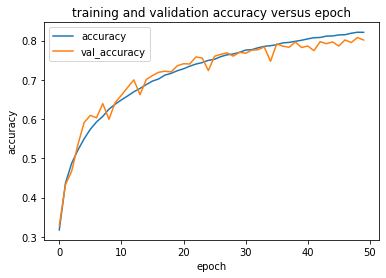

In [258]:
plt.plot(cnn_history.history['accuracy'],label = 'accuracy')
plt.plot(cnn_history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training and validation accuracy versus epoch')
plt.legend()
print(cnn_history.history['accuracy'])
print('------------------------------------------------------------------------------------------------------------------------------------------')
print(cnn_history.history['val_accuracy'])

In [266]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [274]:
pred = cnn.predict(TestX)
real_labels = TestY
pred = [np.argmax(a) for a in pred]
print(len(real_labels))
print(len(pred))
#print(pred)

10000
10000


In [275]:
pred

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 9,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 2,
 9,
 4,
 2,
 3,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 8,
 4,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 4,
 9,
 7,
 2,
 9,
 8,
 7,
 3,
 8,
 8,
 7,
 7,
 7,
 3,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 0,
 3,
 9,
 0,
 3,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 9,
 2,
 8,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 7,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 4,
 0,
 4,
 6,
 7,
 8,
 3,
 1,
 2,
 8,
 2,
 8,
 3,
 6,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 7,
 6,
 6,
 3,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 4,
 8,
 4,
 9,
 0,
 9,
 0,
 9,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 0,
 5,
 2,
 6,
 0,
 8,
 6,
 3,
 3,
 8,
 5,
 8,
 0,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 9,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 3,
 9,
 4,
 4,
 9,
 9,
 4,
 3,
 1,
 5,
 1,
 7,
 8,
 8,
 0,
 4,
 0,
 3,
 5,
 1,
 1,
 8,
 9,
 0,
 2,
 1,
 8,
 2,
 0,


In [276]:
confusion_matrix(TestY,pred)

array([[821,  15,   9,   9,   9,   1,   3,   8,  89,  36],
       [ 12, 886,   0,   2,   2,   0,   2,   0,  27,  69],
       [ 89,  10, 639,  38,  82,  31,  47,  30,  16,  18],
       [ 21,  13,  50, 608,  64,  94,  48,  35,  39,  28],
       [ 17,   2,  32,  29, 799,   5,  23,  64,  21,   8],
       [ 16,   8,  35, 185,  39, 609,  15,  51,  17,  25],
       [  9,   4,  27,  52,  31,   6, 842,   9,  13,   7],
       [ 12,   4,  16,  33,  37,  22,   1, 840,  10,  25],
       [ 26,  18,   0,   4,   3,   0,   2,   3, 925,  19],
       [ 20,  44,   3,   2,   4,   0,   2,   1,  24, 900]], dtype=int64)

In [277]:
def plot_confusion_matrix(cm, labels_name, title):
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')


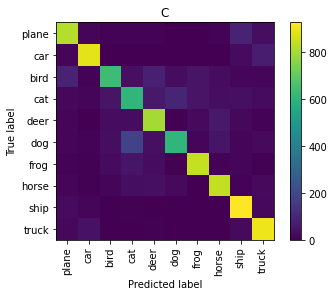

In [278]:
plot_confusion_matrix(confusion_matrix(real_labels,pred),classes,'C')